# **BDA- Experiment 5**

*   **SIA VASHIST**
*    PRN: 20190802107

---

#  Dataset used: Loan Prediction / Clustering.csv
---

# Import the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from IPython.display import display
import warnings
warnings.filterwarnings('ignore')

# Load the dataset

In [2]:
df = pd.read_csv(r"C:\sia\clustering.csv")

# Explore the dataset

In [3]:
display(df.head())

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


In [4]:
display("Statistics of the dataset: ",df.describe())

'Statistics of the dataset: '

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,381.000000,381.000000,381.000000,370.000000,351.000000
mean,3579.845144,1277.275381,104.986877,340.864865,0.837607
std,1419.813818,2340.818114,28.358464,68.549257,0.369338
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2600.000000,0.000000,90.000000,360.000000,1.000000
50%,3333.000000,983.000000,110.000000,360.000000,1.000000
75%,4288.000000,2016.000000,127.000000,360.000000,1.000000
max,9703.000000,33837.000000,150.000000,480.000000,1.000000


In [5]:
#Check for missing values:
print(df.isnull().sum())

Loan_ID               0
Gender                5
Married               0
Dependents            8
Education             0
Self_Employed        21
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     11
Credit_History       30
Property_Area         0
Loan_Status           0
dtype: int64


In [6]:
#drop rows with missing values
df.dropna(inplace=True)

In [7]:
print("Shape of the dataset",df.shape)

Shape of the dataset (308, 13)


# Preprocess the data

In [8]:
df.drop(['Loan_ID', 'Loan_Status'], axis=1, inplace=True)
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)
df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)
df['Property_Area'].fillna(df['Property_Area'].mode()[0], inplace=True)

# Encoding categorical variables
df = pd.get_dummies(df, columns=['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area'])

# Scaling the data:

In [9]:
# Select the features to use for clustering
X = df[['ApplicantIncome', 'LoanAmount']]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [10]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler

# MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# RobustScaler
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)

# Find the optimal number of clusters using the elbow method

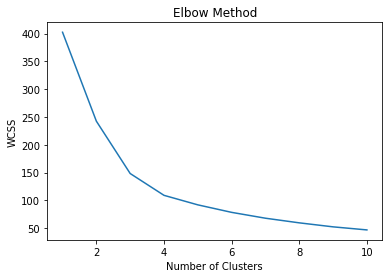

In [11]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# Fit K-Means to the dataset

In [12]:
# Set the number of clusters
k = 3

# Initialize the KMeans object
kmeans = KMeans(n_clusters=k, random_state=42)

# Fit the KMeans model
kmeans.fit(X_scaled)

KMeans(n_clusters=3, random_state=42)

# Visualize the clusters and centroids

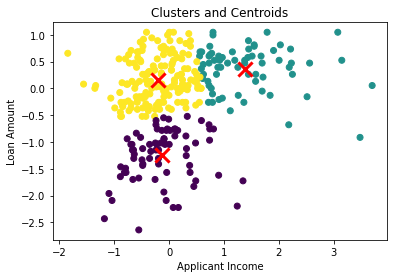

In [13]:
# Get the labels and centroids
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Plot the clusters
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=200, linewidths=3, color='r')
plt.title('Clusters and Centroids')
plt.xlabel('Applicant Income')
plt.ylabel('Loan Amount')
plt.show()

> # Observations:
> The scatter plot also shows that there is a positive correlation between 'ApplicantIncome' and 'LoanAmount'. As ApplicantIncome increases, so does the LoanAmount. This relationship is consistent across all three clusters.

> Based on the scatter plot, we can also see that there are a few outliers in the dataset. These are data points that fall far away from the centroids and do not belong to any of the three clusters. These outliers may be worth further investigation to determine why they are different from the rest of the dataset.

# Conclusion:
Finally, we can conclude that K-Means clustering can be a useful tool for identifying patterns and structure within the loan prediction dataset. It can help us group similar loan applicants together, which can be useful for tasks such as credit risk assessment and loan approval.